```{index} single: application; inventory management
```
```{index} single: solver; cbc
```
```{index} pandas dataframe
```
```{index} sample average approximation
```
```{index} stochastic optimization
```
```{index} simulations
```

# Stock optimization for seafood distribution center

In [2]:
# install Pyomo and solvers
import requests
import types

url = "https://raw.githubusercontent.com/mobook/MO-book/main/python/helper.py"
helper = types.ModuleType("helper")
exec(requests.get(url).content, helper.__dict__)

helper.install_pyomo()
helper.install_cbc()

pyomo was previously installed
cbc was previously installed


True

In [5]:
import pyomo.environ as pyo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

## Problem description
Each day a seafood distribution center buys $x$ tons of tuna at the unit cost $c$ per ton. The next day a demand $z$ is observed from the retailers to whom the fish is sold at a unit price $p > c$. Any leftover tuna needs to be stored in a cold warehouse at a unit holding cost $h$. The seafood distribution center cannot sell more fish than it has in stock, thus at most $\min\{z, x \}$ tons will be sold which will leave $h(x-z)^+$ tons leftover, where $(\cdot)^+$ is the positive residual (that is $a^+:=\max\{0,a\}$). Accounting for these costs, the net profit is $p \min\{z, x \} - cx - h (x-z)^+.$

Given a reasonable estimate of the probability distribution $\mathbb P$ of the tuna demand $z$, to maximize the long-term net profit then we can formulate the following optimization problem:

$$
\begin{align*}
    \max \quad & \mathbb{E}  [ p \min\{z, x \} - cx - h (x-z)^+ ]\\
    \text{s.t.} \quad & x \geq 0.
\end{align*}
$$

Since we have $x \geq 0$ regardless of the demand $z$, the feasible set for the decision variable $x$ is not affected by unknown demand.

## Explicit analytical solution

Assume further that the demand for tuna in tons can be modeled as a continuous random variable $z$ with cumulative distribution function $F(\cdot)$. We consider the following three distributions:

1. A [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution#Cumulative_distribution_function) on the interval $[25, 175]$;

2. A [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution#Cumulative_distribution_function) on the interval $[50,+\infty)$ with $x_m=50$ and exponent $\alpha=2$. Recall that the inverse CDF for a Pareto distribution is given by* $F^{-1}(\varepsilon) = \frac{x_m}{(1-\varepsilon)^{1/\alpha}}$;

3. A [Weibull distribution](https://en.wikipedia.org/wiki/Weibull_distribution#Cumulative_distribution_function) on the interval $[0,+\infty)$ with shape parameter $k=2$ and scale parameter $\lambda=113$.

Note that all the three distributions above have the same expected value, that is $\mathbb E z = 100$ tons. 

The optimal solution of the seafood inventory problem using the closed-form formula that features the inverse CDFs/quantile functions $F^{-1}$ of the considered distribution, that is

$$
x^* = F^{-1} \left( \frac{p-c}{p+h}\right).
$$

In the example below, we report the numerical solution corresponding to the parameters $c = 10$, $p = 25$, and $h = 3$, which determine the quantile of interest, that is $q=\frac{p-c}{p+h} \approx 0.5357$. 

The quantile of interest can be calculated as q=(p - c)/(p + h)=0.5357

Mean of Uniform distribution = 100.00
Optimal solution for Uniform distribution = 105.36 tons

Mean of Pareto distribution = 100.00
Optimal solution for Pareto distribution = 73.38 tons

Mean of Weibull distribution = 100.00
Optimal solution for Weibull distribution = 98.84 tons


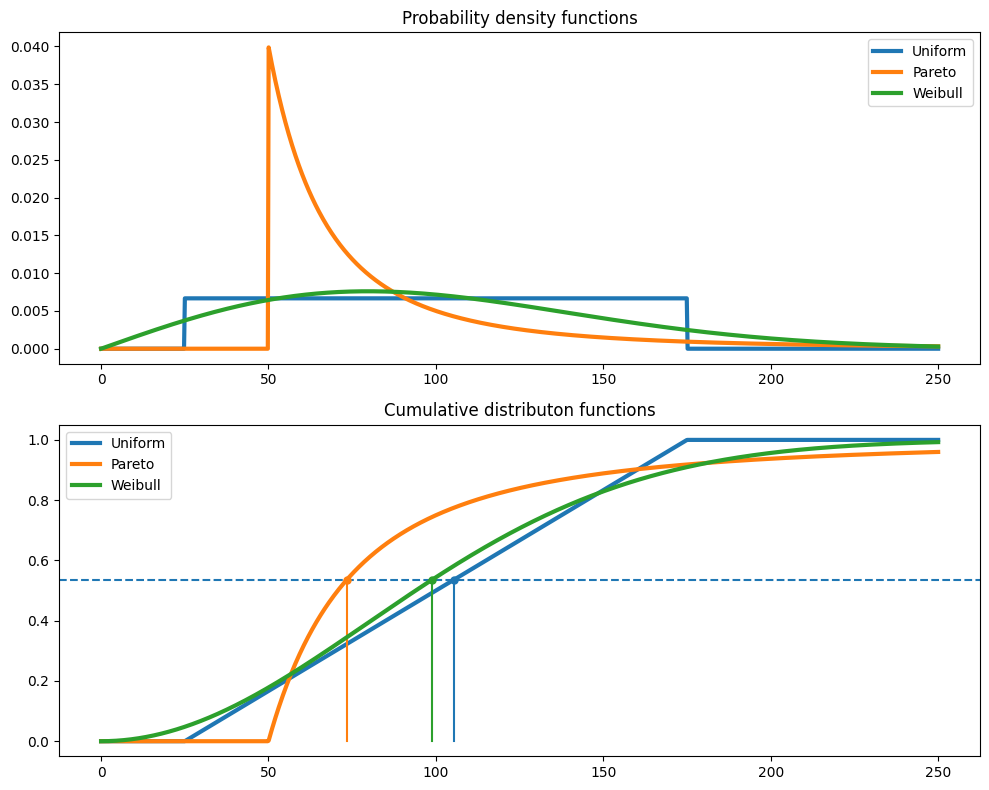

In [12]:
# Setting parameters
c = 10
p = 25
h = 3

# quantile
q = (p - c)/(p + h)
print(f"The quantile of interest can be calculated as q=(p - c)/(p + h) and is equal to {q:.4f}")

x = np.linspace(0, 250, 1000)

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].set_title("Probability density functions")
ax[1].set_title("Cumulative distributon functions")
ax[1].axhline(q, linestyle='--')

def plot_distribution(name, distribution, q):
    
    # find optimal solution using a distribution's quantile function (i.e., ppf in scipy.stats)
    x_opt = distribution.ppf(q)
    print(f"\nMean of {name} distribution = {distribution.mean():0.2f}")    
    print(f"Optimal solution for {name} distribution = {x_opt:0.2f} tons")
    
    # show pdf, cdf, and graphical solution
    c = ax[0].plot(x, distribution.pdf(x), lw=3, label=name)[0].get_color()
    ax[1].plot(x, distribution.cdf(x), color=c, lw=3, label=name)
    ax[1].plot([x_opt]*2, [0, q], color=c)
    ax[1].plot(x_opt, q, '.', color=c, ms=10)
      
plot_distribution("Uniform", stats.uniform(loc=25, scale=150), q)
plot_distribution("Pareto", stats.pareto(scale=50, b=2), q)
plot_distribution("Weibull", stats.weibull_min(scale=112.838, c=2), q)
   
ax[0].legend()
ax[1].legend()
fig.tight_layout()

The quantile of interest can be calculated as q=(p - c)/(p + h) and is equal to 0.5357

Mean of Uniform distribution = 100.00
Optimal solution for Uniform distribution = 105.36 tons

Mean of Pareto distribution = 100.00
Optimal solution for Pareto distribution = 73.38 tons

Mean of Weibull distribution = 100.00
Optimal solution for Weibull distribution = 98.84 tons


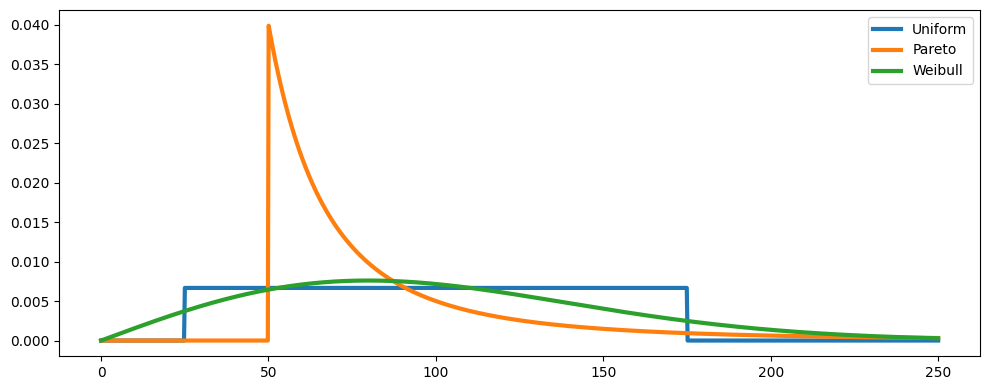

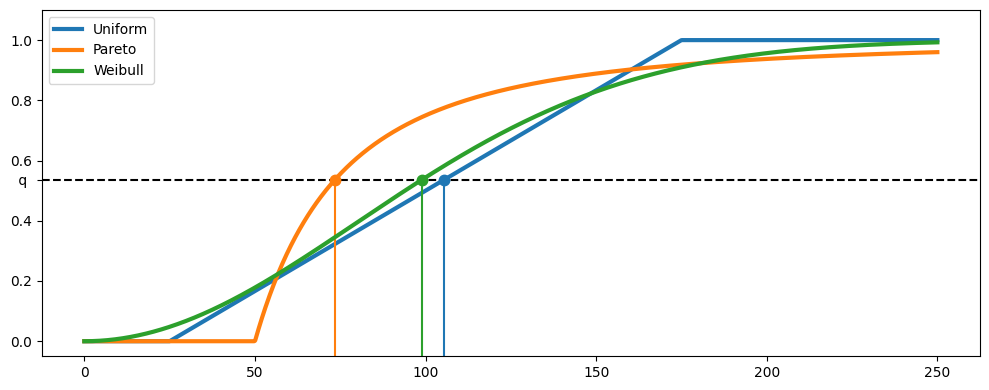

In [58]:
# Setting parameters
c = 10
p = 25
h = 3

# quantile
q = (p - c)/(p + h)
print(f"The quantile of interest can be calculated as q=(p - c)/(p + h) and is equal to {q:.4f}")

distributions = {
"Uniform": stats.uniform(loc=25, scale=150),
"Pareto": stats.pareto(scale=50, b=2),
"Weibull": stats.weibull_min(scale=112.838, c=2),
}

for name, distribution in distributions.items():
    x_opt = distribution.ppf(q)
    print(f"\nMean of {name} distribution = {distribution.mean():0.2f}")    
    print(f"Optimal solution for {name} distribution = {x_opt:0.2f} tons")

# show PDFs
x = np.linspace(0, 250, 1000)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
lines = []
for name, distribution in distributions.items():
    ax.plot(x, distribution.pdf(x), lw=3, label=name)
ax.legend()
fig.tight_layout()
plt.show()

# show CDFs and graphical solutions
extraticks = [q]
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.axhline(q, linestyle = '--', color='k')
for name, distribution in distributions.items():
    x_opt = distribution.ppf(q)
    line, = ax.plot(x, distribution.cdf(x), lw=3, label=name)
    c = line.get_color()
    ax.plot([x_opt]*2, [-0.05, q], color=c)
    ax.plot(x_opt, q, '.', color=c, ms=15)
plt.yticks(list(plt.yticks()[0]) + [q], list(plt.yticks()[1]) + [' q '])
plt.ylim(-0.05, 1.1)
ax.legend()
fig.tight_layout()

## Deterministic solution for average demand

We now find the optimal solution of the *deterministic LP model* obtained by assuming the demand is constant and equal to the average demand, i.e., $z = \bar{z} = \mathbb E z = 100$.

In [12]:
# problem data
c = 10
p = 25
h = 3

m = pyo.ConcreteModel()

# key parameter for possible parametric study
m.mean_demand = pyo.Param(initialize=100, mutable=True)

# first stage variables and expressions
m.x = pyo.Var(domain=pyo.NonNegativeReals)

@m.Expression()
def first_stage_profit(m):
    return -c * m.x

# second stage variables, constraints, and expressions
m.y = pyo.Var(domain=pyo.NonNegativeReals)
m.z = pyo.Var(domain=pyo.NonNegativeReals)

@m.Constraint()
def cant_sell_fish_i_dont_have(m):
    return m.y <= m.mean_demand

@m.Constraint()
def fish_do_not_disappear(m):
    return m.y + m.z == m.x

@m.Expression()
def second_stage_profit(m):
    return p * m.y - h * m.z

# objective
@m.Objective(sense=pyo.maximize)
def total_profit(m):
    return m.first_stage_profit + m.second_stage_profit

result = pyo.SolverFactory('cbc').solve(m)

assert result.solver.status == "ok"
assert result.solver.termination_condition == "optimal"

print(f"Optimal solution for determistic demand equal to the average demand = {m.x():.1f} tons")
print(f"Optimal deterministic profit = {m.total_profit():.0f}€")

Optimal solution for determistic demand equal to the average demand = 100.0 tons
Optimal deterministic profit = 1500€


## Profits resulting from using average demand

We now assess how well we perform by taking the average demand as input for each of the three demand distributions above.

For a fixed decision variable $x=100$, approximate the expected net profit of the seafood distribution center for each of the three distributions above using the Sample Average Approximation method with $N=2500$ points. More specifically, generate $N=2500$ samples from the considered distribution and solve the extensive form of the stochastic LP resulting from those $N=2500$ scenarios.

In [13]:
# SAA of the two-stage stochastic LP to calculate the expected profit when buying the average

def NaiveSeafoodStockSAA(N, sample, distributiontype):

    model = pyo.ConcreteModel()

    def indices_rule(model):
        return range(N)
    model.indices = pyo.Set(initialize=indices_rule)
    model.xi = pyo.Param(model.indices, initialize=dict(enumerate(sample)))

    # first stage variable
    model.x = 100.0 #bought

    def first_stage_profit(model):
        return -c * model.x

    model.first_stage_profit = pyo.Expression(rule=first_stage_profit)

    # second stage variables
    model.y = pyo.Var(model.indices, within=pyo.NonNegativeReals) #sold
    model.z = pyo.Var(model.indices, within=pyo.NonNegativeReals) #unsold to be stored in cold warehouse 

    # second stage constraints
    model.cantsoldthingsfishdonthave = pyo.ConstraintList()
    model.fishdonotdisappear = pyo.ConstraintList()
    for i in model.indices:
        model.cantsoldthingsfishdonthave.add(expr=model.y[i] <= model.xi[i])
        model.fishdonotdisappear.add(expr=model.y[i] + model.z[i] == model.x)

    def second_stage_profit(model):
        return sum([p * model.y[i] - h * model.z[i] for i in model.indices])/float(N)

    model.second_stage_profit = pyo.Expression(rule=second_stage_profit)

    def total_profit(model):
        return model.first_stage_profit + model.second_stage_profit

    model.total_expected_profit = pyo.Objective(rule=total_profit, sense=pyo.maximize)

    result = pyo.SolverFactory('cbc').solve(model)

    print(f'Approximate expected optimal profit when assuming the average demand with {distributiontype}-distributed demand: {model.total_expected_profit():.2f}€')
    
    return model.total_expected_profit()

np.random.seed(0)
N = 7500

samples = np.random.uniform(low=25.0, high=175.0, size=N)
naiveprofit_uniform = NaiveSeafoodStockSAA(N, samples, 'uniform')

shape = 2
xm = 50
samples = (np.random.pareto(a=shape, size=N) + 1) *  xm
naiveprofit_pareto = NaiveSeafoodStockSAA(N, samples, 'Pareto')

shape=2
scale=113
samples = scale*np.random.weibull(a=shape, size=N)
naiveprofit_weibull = NaiveSeafoodStockSAA(N, samples, 'Weibull')

Approximate expected optimal profit when assuming the average demand with uniform-distributed demand: 966.36€
Approximate expected optimal profit when assuming the average demand with Pareto-distributed demand: 787.71€
Approximate expected optimal profit when assuming the average demand with Weibull-distributed demand: 910.55€


## Approximating the solution using Sample Average Approximation method

We now approximate the optimal solution of stock optimization problem for each of the three distributions above using the Sample Average Approximation method. More specifically, generate $N=5000$ samples from each of the three distributions and thhen solve the extensive form of the stochastic LP resulting from those $N=5000$ scenarios. For each of the three distribution, we compare the optimal expected profit with that obtained before and calculate the value of the stochastic solution (VSS).

In [6]:
# Two-stage stochastic LP using SAA

def SeafoodStockSAA(N, sample, distributiontype, printflag=True):

    model = pyo.ConcreteModel()

    def indices_rule(model):
        return range(N)
        
    model.indices = pyo.Set(initialize=indices_rule)
    model.xi = pyo.Param(model.indices, initialize=dict(enumerate(sample)))

    # first stage variable
    model.x = pyo.Var(within=pyo.NonNegativeReals) #bought

    def first_stage_profit(model):
        return -c * model.x

    model.first_stage_profit = pyo.Expression(rule=first_stage_profit)

    # second stage variables
    model.y = pyo.Var(model.indices, within=pyo.NonNegativeReals) #sold
    model.z = pyo.Var(model.indices, within=pyo.NonNegativeReals) #unsold to be returned 

    # second stage constraints
    model.cantsoldfishidonthave = pyo.ConstraintList()
    model.fishdonotdisappear = pyo.ConstraintList()
    for i in model.indices:
        model.cantsoldfishidonthave.add(expr=model.y[i] <= model.xi[i])
        model.fishdonotdisappear.add(expr=model.y[i] + model.z[i] == model.x)

    def second_stage_profit(model):
        return sum([p * model.y[i] - h * model.z[i] for i in model.indices])/float(N)

    model.second_stage_profit = pyo.Expression(rule=second_stage_profit)

    def total_profit(model):
        return model.first_stage_profit + model.second_stage_profit

    model.total_expected_profit = pyo.Objective(rule=total_profit, sense=pyo.maximize)

    result = pyo.SolverFactory('cbc').solve(model)
    
    if printflag:
        print(f"Approximate solution in the case of {distributiontype} distribution using N={N:.0f} samples")
        print(f"Solver status: {result.solver.status}, {result.solver.termination_condition}")
        print(f"Approximate optimal solution: x = {model.x.value:.2f} tons")
        print(f"Approximate expected optimal profit: {model.total_expected_profit():.2f}€")
    
    return model.total_expected_profit(), model.x.value

np.random.seed(1)
N = 5000

samples = np.random.uniform(low=25.0, high=175.0, size=N)
smartprofit_uniform, x = SeafoodStockSAA(N, samples, 'uniform')
print(f"Value of the stochastic solution: {smartprofit_uniform:.2f}-{naiveprofit_uniform:.2f} = {smartprofit_uniform-naiveprofit_uniform:.2f}€\n")

shape = 2
xm = 50
samples = (np.random.pareto(a=shape, size=N) + 1) *  xm
smartprofit_pareto, x = SeafoodStockSAA(N, samples, 'Pareto')
print(f"Value of the stochastic solution: {smartprofit_pareto:.2f}-{naiveprofit_pareto:.2f} = {smartprofit_pareto-naiveprofit_pareto:.2f}€\n")

shape = 2
scale = 113
samples = scale*np.random.weibull(a=shape, size=N)
smartprofit_weibull, x = SeafoodStockSAA(N, samples, 'Weibull')
print(f"Value of the stochastic solution: {smartprofit_weibull:.2f}-{naiveprofit_weibull:.2f} = {smartprofit_weibull-naiveprofit_weibull:.2f}€\n")

Approximate solution in the case of uniform distribution using N=5000 samples
Solver status: ok, optimal
Approximate optimal solution: x = 105.82 tons
Approximate expected optimal profit: 979.98€
Value of the stochastic solution: 979.98-966.36 = 13.63€

Approximate solution in the case of Pareto distribution using N=5000 samples
Solver status: ok, optimal
Approximate optimal solution: x = 73.33 tons
Approximate expected optimal profit: 890.72€
Value of the stochastic solution: 890.72-787.71 = 103.00€

Approximate solution in the case of Weibull distribution using N=5000 samples
Solver status: ok, optimal
Approximate optimal solution: x = 100.06 tons
Approximate expected optimal profit: 919.08€
Value of the stochastic solution: 919.08-910.55 = 8.54€



## Convergence of the SAA method

The SAA method becomes more precise as the sample size $N$ increases. To illustrate this, we solve the same optimization problem as before but using a different number of samples, with the sample size $N$ increasing from $25$ to $3000$. As we can see, the approximate solutions converge to the theoretical ones as the sample size increases.

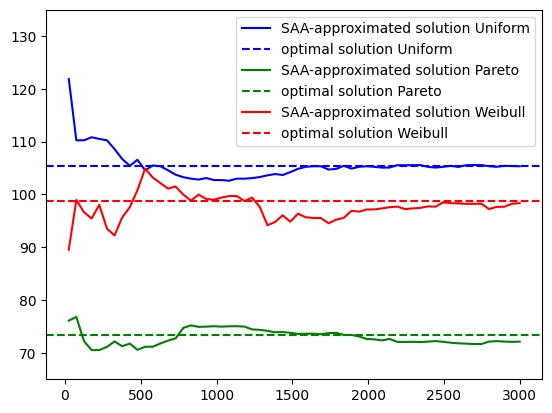

In [7]:
shape = 2
xm = 50
scale = 113
levels = 60

table = np.zeros((levels,7))

for i, N in enumerate(np.linspace(25, 3000, levels, dtype=int)):
    
    np.random.seed(0)
    samples = np.random.uniform(low=25.0, high=175.0, size=N)
    profit_uniform, xu = SeafoodStockSAA(N, samples, 'uniform', False)
    samples = (np.random.pareto(a=shape, size=N) + 1) *  xm
    profit_pareto, xp = SeafoodStockSAA(N, samples, 'Pareto', False)
    samples = scale*np.random.weibull(a=shape, size=N)
    profit_weibull, xw = SeafoodStockSAA(N, samples, 'Weibull', False)
    table[i] = [N, xu, xp, xw, profit_uniform, profit_pareto, profit_weibull]
    
plt.plot(table[:,0],table[:,1], "-b", label='SAA-approximated solution Uniform')
plt.axhline(y=105.36, color='b', linestyle='--', label='optimal solution Uniform')
plt.plot(table[:,0],table[:,2], "-g", label='SAA-approximated solution Pareto')
plt.axhline(y=73.38, color='g', linestyle='--', label='optimal solution Pareto')
plt.plot(table[:,0],table[:,3], "-r", label='SAA-approximated solution Weibull')
plt.axhline(y=98.84, color='r', linestyle='--', label='optimal solution Weibull')
plt.legend(loc="upper right")
plt.ylim(65,135)
plt.show()